# I. Introduction

Using the Melbourne Housing Market data, I want to create a model to predict a house value. 
You can download and read the discription of the dataframe here: https://www.kaggle.com/anthonypino/melbourne-housing-market

In [38]:
import pandas as pd #data processing, CSV file I/O
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.integrate as integrate
from matplotlib import pyplot
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression

# II. Exploratory Analysis

In the first part of the report. I try to answer these questions: <br>
1. How many observations do I have?
2. How many features?
3. What are the data types of my features? Are they numeric? Categorical?
4. Do I have a target variable?

In [2]:
df = pd.read_csv(r"C:\Users\tctha\OneDrive\Documents\cbd\Melbourne_housing_FULL.csv") #get data from csv file

In [54]:
df.shape

(34857, 21)

In this dataframe, there are 34857 observants and 21 features. 

In [20]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

We have numeric and categorical data. Price is target variable in this report since we want to predict the value of the house. 

Let's have a look at the example of this dataset.

In [10]:
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


Lattitude and Longtitude might not be used to predict the price of the house. 

In [21]:
display(df.isnull().any())

Suburb           False
Address          False
Rooms            False
Type             False
Price             True
Method           False
SellerG          False
Date             False
Distance          True
Postcode          True
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude         True
Longtitude        True
Regionname        True
Propertycount     True
dtype: bool

There are many missing data columns in our dataset. These missing values might affect our model, especially the ones in Price column. 

C:\Users\tctha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026FEE3D6198>,
      dtype=object)

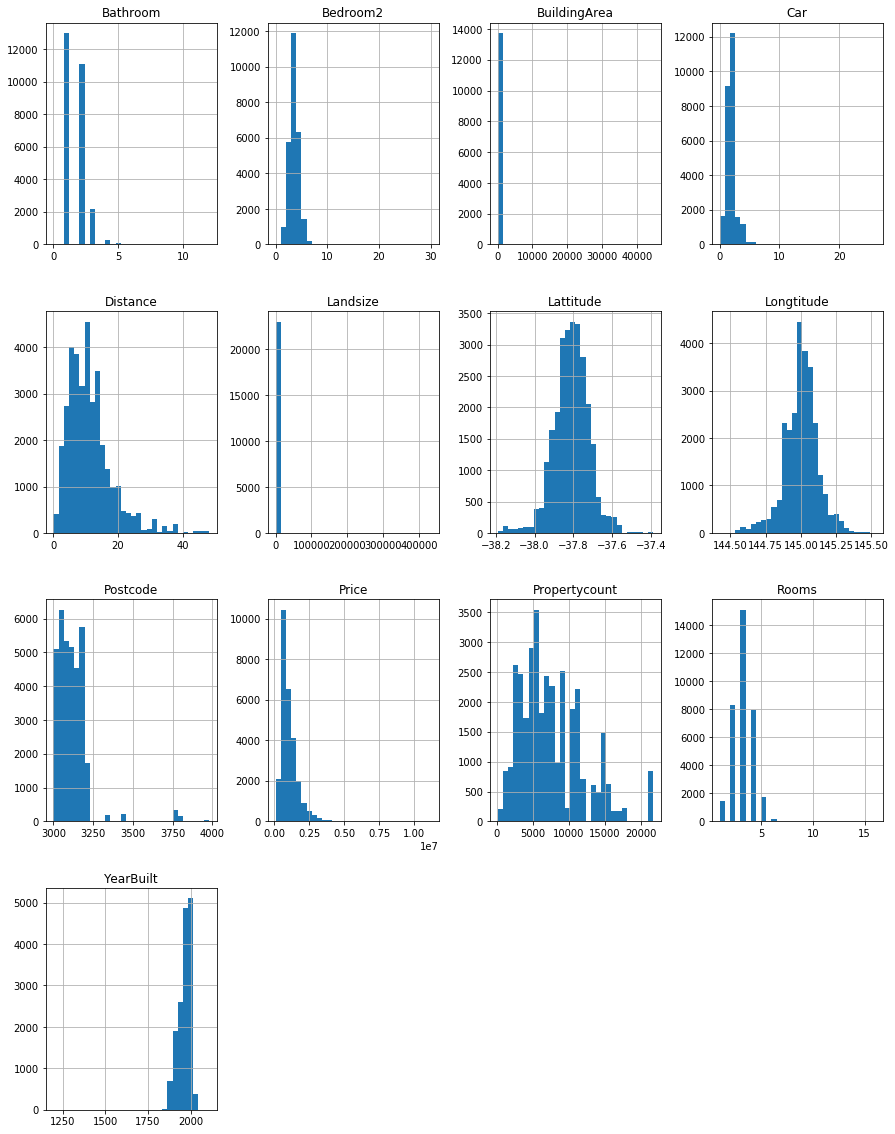

In [33]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax, bins=30)

I have some observations from the histograms:
1. Most of the features might have large outliers, except YearBult might have small outliers.
2. Rooms feature has bell shape if we eliminate all the large outlier.

In [13]:
for i in df.dtypes[df.dtypes == object].index:
   print(df[i].value_counts())
   print('')

Reservoir             844
Bentleigh East        583
Richmond              552
Glen Iris             491
Preston               485
Kew                   467
Brighton              456
Brunswick             444
South Yarra           435
Hawthorn              428
Northcote             424
Camberwell            423
Balwyn North          420
Essendon              409
Coburg                405
Glenroy               400
Brighton East         393
Pascoe Vale           378
St Kilda              374
Port Melbourne        371
Malvern East          369
Prahran               336
Thornbury             322
Balwyn                319
Bentleigh             319
Yarraville            304
Surrey Hills          293
Elwood                288
Moonee Ponds          285
Hawthorn East         284
                     ... 
Hurstbridge             2
Upwey                   2
Darley                  2
Plenty                  2
Wattle Glen             2
Silvan                  2
Werribee South          2
Tecoma      

I make an iteration through all the categorical features and have the following conclusions:
1. Suburb, Address, SellerG,CouncilArea has so many categories. It is not very helpful to plot bar chart on teir raw data like that. 
2. We can get good overview from the bar charts of Type, Method, Regionname. We plot their bar charts first. 
3. Date is not really useful if we keep it like this. We can readjust this later. 

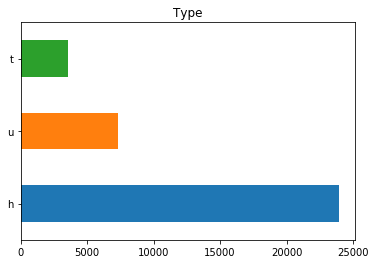

In [40]:
df['Type'].value_counts().plot(kind='barh',title = 'Type')

Lots of people have type 'h' (more than 25000). More than 5000 people have type u. 

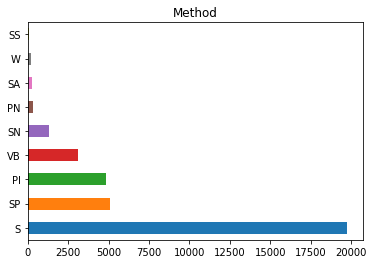

In [41]:
df['Method'].value_counts().plot(kind='barh',title = 'Method')

Not many people choose SS,W,SA,PN. We may eliminate these categories to avoid make the model overfitting. 

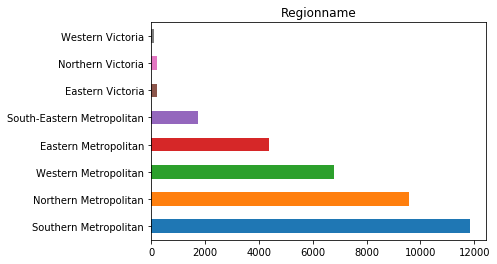

In [10]:
df['Regionname'].value_counts().plot(kind='barh',title = 'Regionname')

Not many houses are in Victoria. We might eliminate these from the dataset. 

<font color='red'>Now I am going to show the box plots of the above categorical variables with Price. </font>

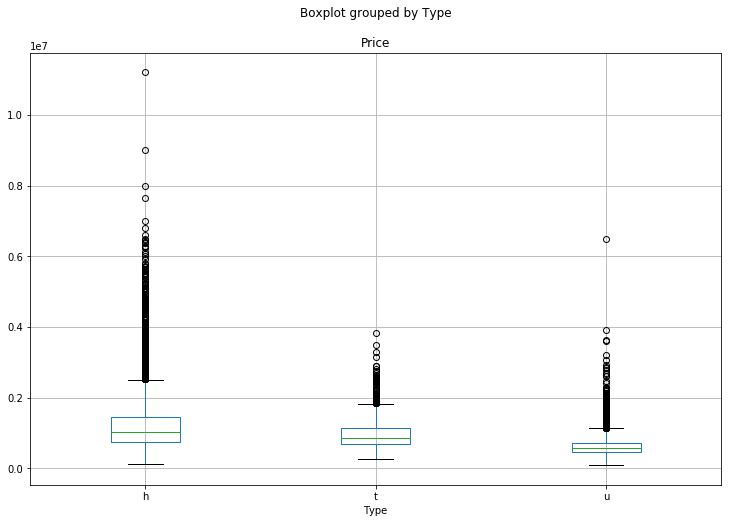

In [21]:
df.boxplot(column='Price',by='Type',figsize=(12,8))

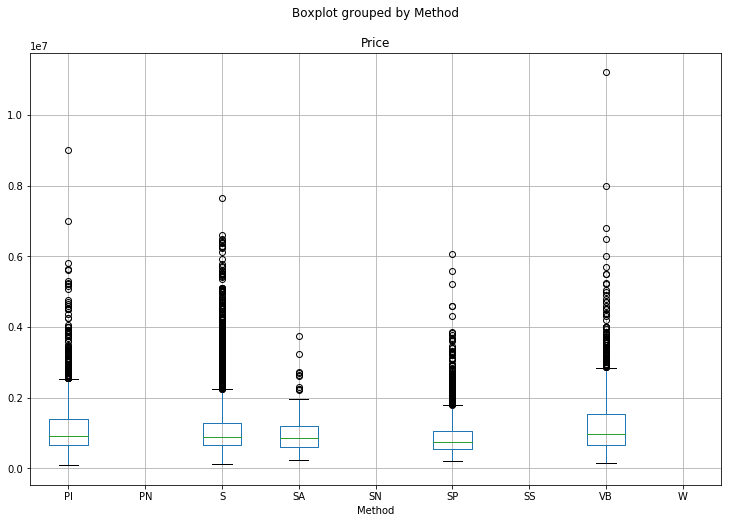

In [22]:
df.boxplot(column='Price',by='Method',figsize=(12,8))

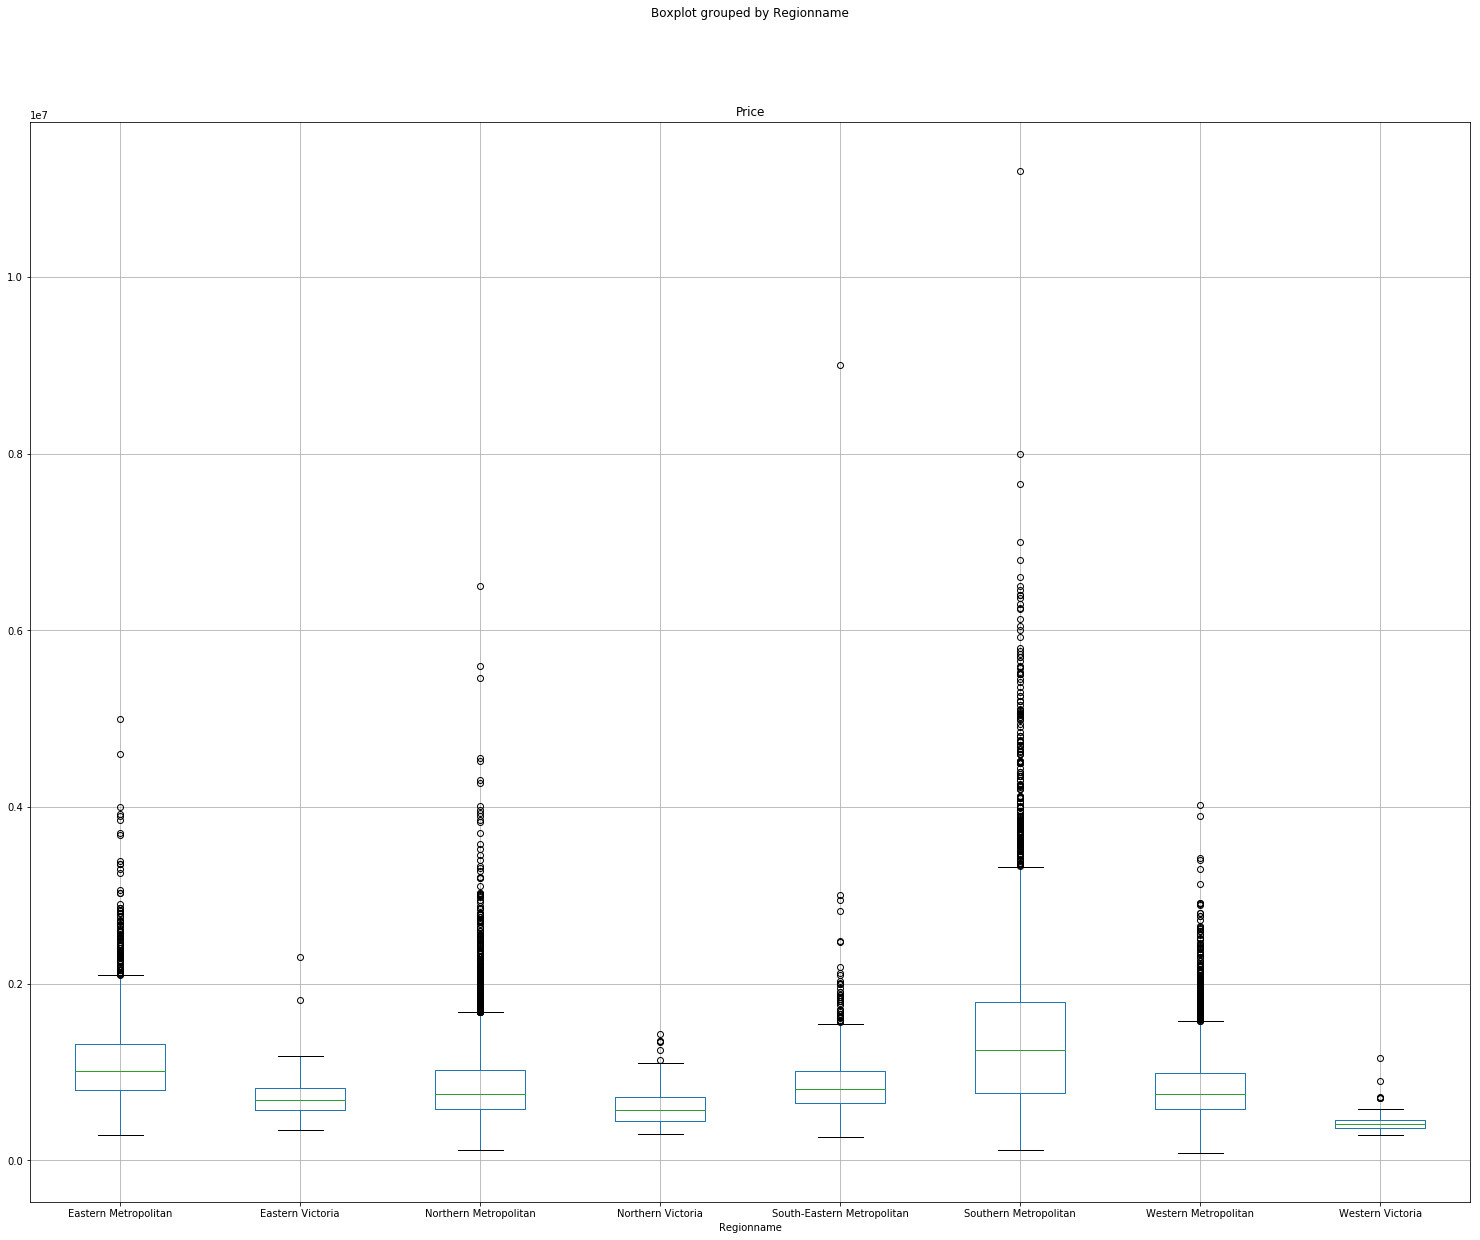

In [29]:
df.boxplot(column='Price',by='Regionname',figsize=(25,20))

From the above boxplot, I have some assumptions: 
1. There are suspicious outliers in the dataset.
2. Type h has best price while u has the lowest ones.
3. It seems like the method does not affect the price much.
4. Southern Eastern Metropolitan have good price while Western Victoria houses are the cheapest.

<font color='red'>I am going to use heat map to find the the correlation between numerical features. </font> 

In [37]:
heat_map = df[['Rooms','Price','Distance','Postcode','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Lattitude','Longtitude','Propertycount']]

In [38]:
corr_heat_map = heat_map.corr()

In [39]:
corr_heat_map

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.465238,0.271511,0.085890,0.946755,0.611826,0.393878,0.037402,0.156229,-0.012749,0.004872,0.103235,-0.071677
Price,0.465238,1.000000,-0.211384,0.044950,0.430275,0.429878,0.201803,0.032748,0.100754,-0.333306,-0.215607,0.197874,-0.059017
Distance,0.271511,-0.211384,1.000000,0.481566,0.269524,0.126201,0.241835,0.060862,0.076301,0.323059,-0.100417,0.200946,-0.018140
Postcode,0.085890,0.044950,0.481566,1.000000,0.089292,0.120080,0.067886,0.040664,0.042437,0.089805,-0.231027,0.362895,0.017108
Bedroom2,0.946755,0.430275,0.269524,0.089292,1.000000,0.614892,0.388491,0.037019,0.154157,-0.002022,0.003447,0.106164,-0.053451
Bathroom,0.611826,0.429878,0.126201,0.120080,0.614892,1.000000,0.307518,0.036333,0.147558,0.167955,-0.059183,0.106531,-0.032887
Car,0.393878,0.201803,0.241835,0.067886,0.388491,0.307518,1.000000,0.037829,0.104373,0.128702,-0.009020,0.047213,-0.009617
Landsize,0.037402,0.032748,0.060862,0.040664,0.037019,0.036333,0.037829,1.000000,0.354530,0.044474,0.025318,-0.002582,-0.018195
BuildingArea,0.156229,0.100754,0.076301,0.042437,0.154157,0.147558,0.104373,0.354530,1.000000,0.067811,0.017155,-0.002143,-0.024523
YearBuilt,-0.012749,-0.333306,0.323059,0.089805,-0.002022,0.167955,0.128702,0.044474,0.067811,1.000000,0.091592,-0.022175,0.022420


In [40]:
mask = np.zeros_like(corr_heat_map, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

Set up mask to hide upper triangle

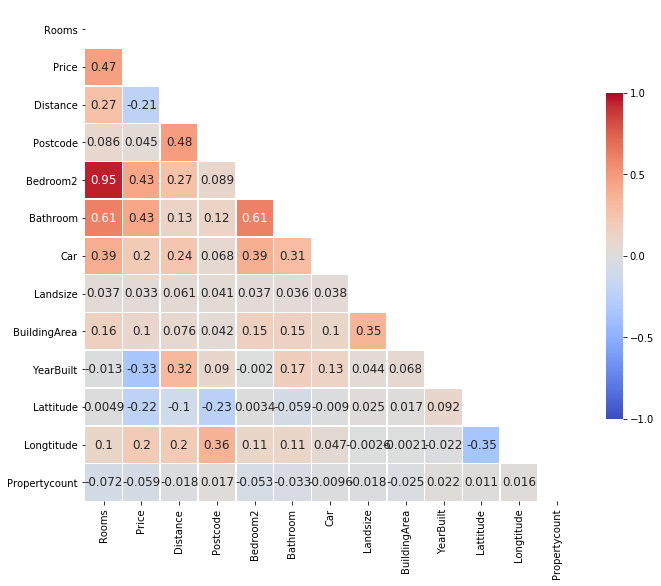

In [41]:
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_heat_map, mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_heat_map.columns, rotation = 0)
ax.set_xticklabels(corr_heat_map.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

From the heat map we can see the strong relationship between the bedroom2 and Rooms. It sounds right. 

# III. Data Cleaning

## 1. Remove Unwanted observations

<font color='red'>Duplicate observations</font>

The code below will find and run out the position of the duplicate observations

In [80]:
for i in df.duplicated(subset=None, keep='first').tolist():
    if i == True:
       print(df.duplicated(subset=None, keep='first').tolist().index(i)) 

15858


In [81]:
df[df['Address']=='1/7 Lilian St']

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [3]:
df_cleaning = df.drop(df.index[15858])

In [24]:
df_cleaning[df_cleaning['Address']=='1/7 Lilian St']

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


After remove duplicate observation, we obtain df_cleaning from df.

<font color='red'>Irrelevant observations</font>

I did not find any irrelevant observations. 

<font color='red'>Handle Missing Data</font>

In [45]:
display(df_cleaning.isnull().sum())

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

We can drop the null values in CouncilArea, Regionname and Propertycount because there are a only a few of null values there

In [4]:
df_cleaning = df_cleaning.dropna(axis=0, subset=['CouncilArea','Regionname','Propertycount'])

In [5]:
df_cleaning['Price'].fillna(df_cleaning['Price'].mean(), inplace=True)
df_cleaning['Distance'].fillna(df_cleaning['Distance'].mean(), inplace=True)
df_cleaning['Postcode'].fillna(df_cleaning['Postcode'].mean(), inplace=True)
df_cleaning['Bedroom2'].fillna(df_cleaning['Bedroom2'].mean(), inplace=True)
df_cleaning['Bathroom'].fillna(df_cleaning['Bathroom'].mean(), inplace=True)
df_cleaning['Car'].fillna(df_cleaning['Car'].mean(), inplace=True)
df_cleaning['Landsize'].fillna(df_cleaning['Landsize'].mean(), inplace=True)
df_cleaning['BuildingArea'].fillna(df_cleaning['BuildingArea'].mean(), inplace=True)
df_cleaning['YearBuilt'].fillna(df_cleaning['YearBuilt'].mean(), inplace=True)
df_cleaning['Propertycount'].fillna(df_cleaning['Propertycount'].mean(), inplace=True)
df_cleaning['Lattitude'].fillna(df_cleaning['Lattitude'].median(), inplace=True)
df_cleaning['Longtitude'].fillna(df_cleaning['Longtitude'].median(), inplace=True)

In [37]:
display(df_cleaning.isnull().sum().sum())

0

In [6]:
num_ = df_cleaning.select_dtypes(include=["number"])
cat_ = df_cleaning.select_dtypes(exclude=["number"])

In [7]:
idx = np.all(stats.zscore(num_) < 3, axis=1)

In [49]:
idx

array([ True,  True,  True, ...,  True,  True,  True])

In [8]:
df_cleaning = pd.concat([num_.loc[idx], cat_.loc[idx]], axis=1)

In [11]:
df_cleaning

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Longtitude,Propertycount,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,2,1.050210e+06,2.5,3067.0,2.00000,1.000000,1.000000,126.000000,160.251616,1965.287653,...,144.99580,4019.0,Abbotsford,68 Studley St,h,SS,Jellis,3/09/2016,Yarra City Council,Northern Metropolitan
1,2,1.480000e+06,2.5,3067.0,2.00000,1.000000,1.000000,202.000000,160.251616,1965.287653,...,144.99840,4019.0,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra City Council,Northern Metropolitan
2,2,1.035000e+06,2.5,3067.0,2.00000,1.000000,0.000000,156.000000,79.000000,1900.000000,...,144.99340,4019.0,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra City Council,Northern Metropolitan
3,3,1.050210e+06,2.5,3067.0,3.00000,2.000000,1.000000,0.000000,160.251616,1965.287653,...,145.01160,4019.0,Abbotsford,18/659 Victoria St,u,VB,Rounds,4/02/2016,Yarra City Council,Northern Metropolitan
4,3,1.465000e+06,2.5,3067.0,3.00000,2.000000,0.000000,134.000000,150.000000,1900.000000,...,144.99440,4019.0,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan
5,3,8.500000e+05,2.5,3067.0,3.00000,2.000000,1.000000,94.000000,160.251616,1965.287653,...,144.99690,4019.0,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan
6,4,1.600000e+06,2.5,3067.0,3.00000,1.000000,2.000000,120.000000,142.000000,2014.000000,...,144.99410,4019.0,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,Yarra City Council,Northern Metropolitan
7,4,1.050210e+06,2.5,3067.0,3.00000,2.000000,2.000000,400.000000,220.000000,2006.000000,...,144.99650,4019.0,Abbotsford,16 Maugie St,h,SN,Nelson,6/08/2016,Yarra City Council,Northern Metropolitan
8,2,1.050210e+06,2.5,3067.0,4.00000,1.000000,2.000000,201.000000,160.251616,1900.000000,...,144.99740,4019.0,Abbotsford,53 Turner St,h,S,Biggin,6/08/2016,Yarra City Council,Northern Metropolitan
9,2,1.050210e+06,2.5,3067.0,3.00000,2.000000,1.000000,202.000000,160.251616,1900.000000,...,144.99890,4019.0,Abbotsford,99 Turner St,h,S,Collins,6/08/2016,Yarra City Council,Northern Metropolitan


# 4. Linear Regression

<font color='red'>Holdout</font>

In [12]:
X = df_cleaning[['Rooms','Distance','Postcode','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt']]

In [14]:
y = df_cleaning['Price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

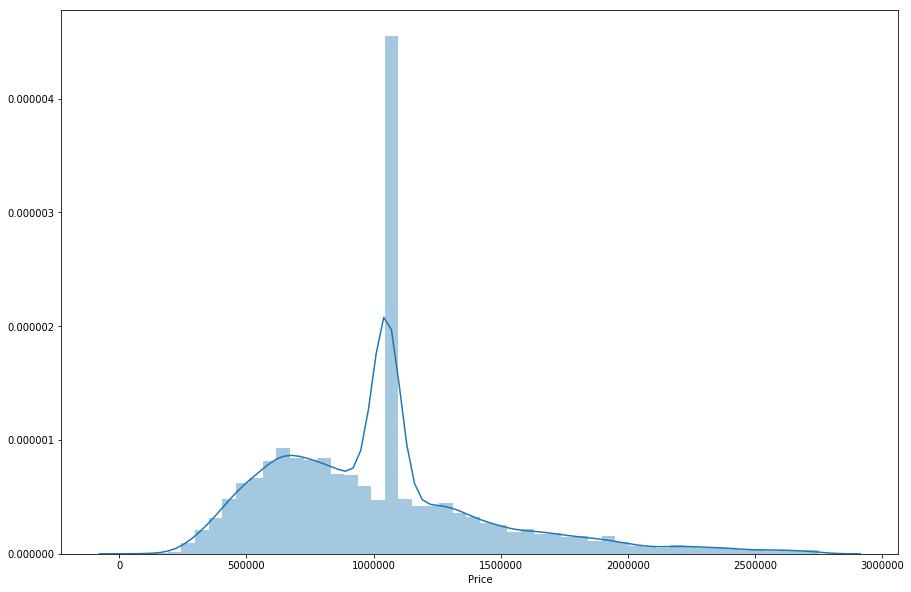

In [28]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df_cleaning['Price'])

In [16]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Rooms,264719.316184
Distance,-27513.238769
Postcode,2055.497992
Bedroom2,-82054.846676
Bathroom,59014.395128
Car,36955.660549
Landsize,33.340626
BuildingArea,825.323830
YearBuilt,-2636.097015


In [18]:
y_pred = regressor.predict(X_test)

In [25]:
check_y = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
check_y_head = check_y.head(25)

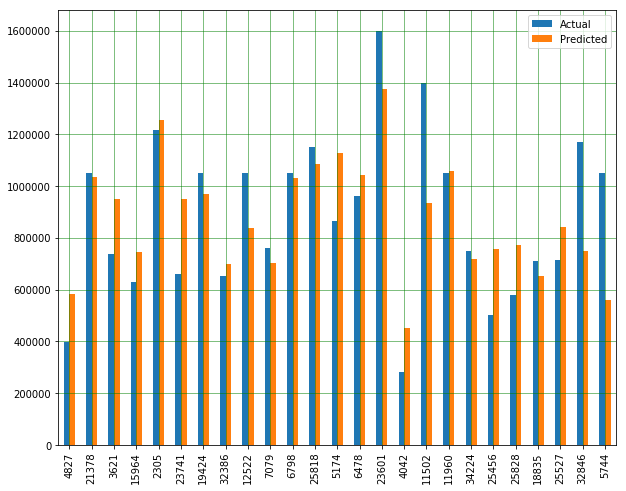

In [26]:
check_y_head.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 249147.99673800715
Mean Squared Error: 108576601625.26964
Root Mean Squared Error: 329509.63813714107


In [30]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))/1000000

0.32950963813714107

<font color='red'>K-Fold Cross Validation</font>

In [41]:
lm_k = linear_model.LinearRegression()
k_predictions = cross_val_predict(lm_k, X, y, cv = 10)

In [43]:
print(k_predictions)

[925799.62229022 927608.60988201 999049.52522612 ... 619316.87928665
 963068.80108731 719209.54796393]


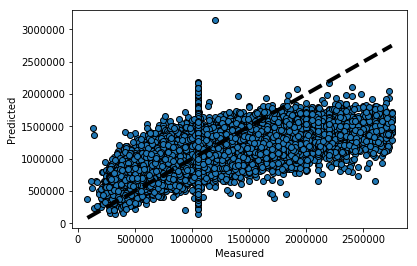

In [45]:
fig, ax = plt.subplots()
ax.scatter(y, k_predictions, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Residual plot

Text(0,0.5,'Residual')

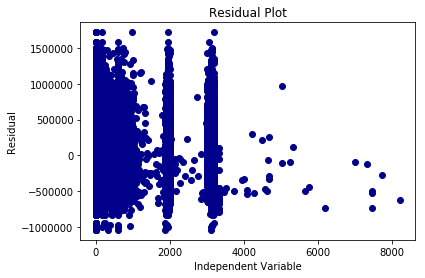

In [53]:
residuals = y_test-y_pred
plt.plot(X_test,residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")

Homoscedasticity